In [1]:
import numpy as np

# 两个列表，分别存储纳木错流域和色林错流域的年降雨量数据
# 纳木错流域年降雨量等影响因素数据
namagecuo_rainfall = [379.23,382.95,383.63,386.54,384.36]
# 色林错流域年降雨量等影响因素数据
selingcuo_rainfall = [382.36,386.93,387.98,389.34,388.65]

# Mann-Kendall趋势检验函数
def mann_kendall_trend_test(data):
    n = len(data)
    s = sum((np.sign(b - a) for a, b in zip(data[:-1], data[1:])))
    
    # 计算方差 s^2
    if n == 1:
        var_s = 0  # 如果只有一个数据点，方差为0
    elif n == 2:
        var_s = 2  # 如果只有两个数据点，根据公式计算方差为2
    else:
        var_s = (n * (n - 1) * (2 * n + 5)) / 18
        unique_data = np.unique(data)
        g = []
        for x in unique_data:
            g_x = np.sum([1 for y in data if y == x])
            g.append(g_x)
        ties = np.sum([(g_i ** 3 - g_i) for g_i in g]) / (18 * n * (n - 1) * (n - 2))
        if ties != 0:
            var_s -= ties
    
    z = s / np.sqrt(var_s)
    trend = '上升' if z > 0 else ('下降' if z < 0 else '无显著趋势')
    return z, trend

# 对纳木错流域年降雨量等影响因素数据进行Mann-Kendall趋势检验
namagecuo_z, namagecuo_trend = mann_kendall_trend_test(namagecuo_rainfall)
print(f"纳木错流域Mann-Kendall趋势检验结果：Z值 = {namagecuo_z}, 趋势 = {namagecuo_trend}")

# 对色林错流域年降雨量等影响因素数据进行Mann-Kendall趋势检验
selingcuo_z, selingcuo_trend = mann_kendall_trend_test(selingcuo_rainfall)
print(f"色林错流域Mann-Kendall趋势检验结果：Z值 = {selingcuo_z}, 趋势 = {selingcuo_trend}")

纳木错流域Mann-Kendall趋势检验结果：Z值 = 0.4898979485566356, 趋势 = 上升
色林错流域Mann-Kendall趋势检验结果：Z值 = 0.4898979485566356, 趋势 = 上升


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
 
# 设置字体为SimHei显示中文标签
rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 纳木错流域年降雨量数据
namagecuo_rainfall = [379.23,382.95,383.63,386.54,384.36]
# 色林错流域年降雨量数据
selingcuo_rainfall = [382.36,386.93,387.98,389.34,388.65]

# 年份数据
years = np.arange(2020, 2020 + len(namagecuo_rainfall))

# Mann-Kendall趋势检验函数
def mann_kendall_trend_test(data):
    n = len(data)
    s = sum((np.sign(b - a) for a, b in zip(data[:-1], data[1:])))
    
    # 计算方差 s^2
    if n == 1:
        var_s = 0
    elif n == 2:
        var_s = 2
    else:
        unique_data = np.unique(data)
        g = [np.sum(data == x) for x in unique_data]
        ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))
        var_s = (n * (n - 1) * (2 * n + 5)) / 18 - ties
    
    z = s / np.sqrt(var_s)
    trend = '上升' if z > 0 else ('下降' if z < 0 else '无显著趋势')
    return z, trend

# 进行Mann-Kendall趋势检验
namagecuo_z, namagecuo_trend = mann_kendall_trend_test(namagecuo_rainfall)
selingcuo_z, selingcuo_trend = mann_kendall_trend_test(selingcuo_rainfall)

# 线性拟合函数
def linear_fit(data, x):
    coefficients = np.polyfit(x, data, 1)
    polynomial = np.poly1d(coefficients)
    return polynomial

# 获取线性拟合结果
namagecuo_poly = linear_fit(namagecuo_rainfall, years)
selingcuo_poly = linear_fit(selingcuo_rainfall, years)



C:\Users\yj\AppData\Local\Temp\ipykernel_16624\2168221226.py:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))


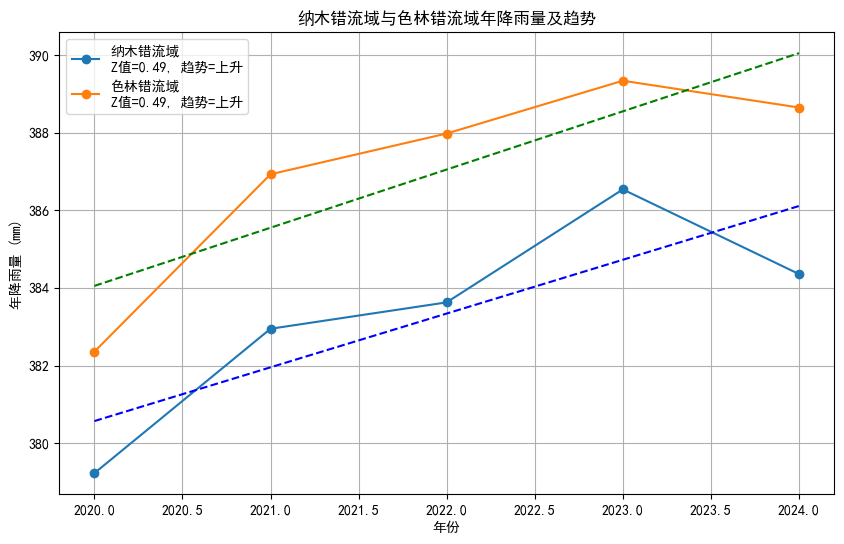

In [3]:
# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(years, namagecuo_rainfall, label=f'纳木错流域\nZ值={namagecuo_z:.2f}, 趋势={namagecuo_trend}', marker='o')
plt.plot(years, namagecuo_poly(years), '--', color='blue')
plt.plot(years, selingcuo_rainfall, label=f'色林错流域\nZ值={selingcuo_z:.2f}, 趋势={selingcuo_trend}', marker='o')
plt.plot(years, selingcuo_poly(years), '--', color='green')

plt.xlabel('年份')
plt.ylabel('年降雨量 (mm)')
plt.title('纳木错流域与色林错流域年降雨量及趋势')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
from scipy.stats import pearsonr

# 纳木错流域年降雨量数据和面积数据
namagecuo_rainfall = [379.23, 382.95, 383.63, 386.54, 384.36]
namagecuo_area = [2024.53274044173, 2026.89980135994, 2025.2003511928287, 2028.584700597508, 2023.9004481515449]

# 色林错流域年降雨量数据和面积数据
selingcuo_rainfall = [382.36, 386.93, 387.98, 389.34, 388.65]
selingcuo_area = [2455.1307976720595, 2463.2965747038156, 2463.1646223985617, 2480.664037366236, 2478.0915590543696]

# 计算纳木错的相关系数和P值
namagecuo_corr, namagecuo_p_value = pearsonr(namagecuo_rainfall, namagecuo_area)
print(f"纳木错相关系数: {namagecuo_corr:.4f}, P值: {namagecuo_p_value:.4f}")

# 计算色林错的相关系数和P值
selingcuo_corr, selingcuo_p_value = pearsonr(selingcuo_rainfall, selingcuo_area)
print(f"色林错相关系数: {selingcuo_corr:.4f}, P值: {selingcuo_p_value:.4f}")

# 判断是否显著正相关（P < 0.05）
def is_significant_positive_correlation(corr, p_value, significance_level=0.05):
    return corr > 0 and p_value < significance_level

namagecuo_significant = is_significant_positive_correlation(namagecuo_corr, namagecuo_p_value)
selingcuo_significant = is_significant_positive_correlation(selingcuo_corr, selingcuo_p_value)

print(f"纳木错降水量与湖泊面积是否呈显著正相关 (P < 0.05): {'是' if namagecuo_significant else '否'}")
print(f"色林错降水量与湖泊面积是否呈显著正相关 (P < 0.05): {'是' if selingcuo_significant else '否'}")

纳木错相关系数: 0.5698, P值: 0.3159
色林错相关系数: 0.8429, P值: 0.0730
纳木错降水量与湖泊面积是否呈显著正相关 (P < 0.05): 否
色林错降水量与湖泊面积是否呈显著正相关 (P < 0.05): 否
